### Задание

Первая часть: необходимо приоритезировать гипотезы с помощью фреймворков ICE, RICE, а также определить, как изменились результаты после изменения фреймворка

Вторая часть: необходимо рассмотреть результаты проведения А/В теста: предобработать данные, интерпретировать результаты и принять решение о продолжении теста

Для решения задач выше были предложены 3 датасета: 
* датасет с описанием гипотез (hypothesis.csv);
* датасет с описанием заказов, которые совершили пользователи - участники А/В теста (orders.csv);
* датасет с описанием количества участников А/В теста (visitors.csv)


In [3]:
#подгружаем библиотеки

import pandas as pd
import datetime as dt
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings

# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()

### Часть 1: приоритезация гипотез

In [53]:
#подгружаем данные

try:
    data_hypothesis = pd.read_csv("~/Desktop/projects/hypothesis.csv")
except:
    data_hypothesis = pd.read_csv("/datasets/hypothesis.csv")

display(data_hypothesis.head())

data_hypothesis['Hypothesis'].unique()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


array(['Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей',
       'Запустить собственную службу доставки, что сократит срок доставки заказов',
       'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа',
       'Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар',
       'Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей',
       'Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов',
       'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию',
       'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок',
       'Запустить акцию, дающую скидку на товар в день рождения'],
      dtype=object)

In [5]:
#проверим данные на наличие пустых значений, тип данных

data_hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


В датасете 9 гипотез, оценки имеют тип данных int64 - целочисленные значения, пустые значения отсутствуют

In [54]:
#приоритезируем гипотезы с помощью фреймворка ICE:

data_hypothesis['ICE'] = round(data_hypothesis['Impact'] * data_hypothesis['Confidence'] / data_hypothesis['Efforts'],2)

data_hypothesis.sort_values(by = 'ICE', ascending = False).head()

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.33
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.20
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.00
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.00


Среди всех гипотез приоритет по фреймворку ICE получают гипотезы под номером 9, 1 и 8 (индексы гипотез соответственно - 8, 0, 7).

In [7]:
#приоритезируем гипотезы с помощью фреймворка RICE:

data_hypothesis['RICE'] = data_hypothesis['Reach'] * data_hypothesis['Impact'] * data_hypothesis['Confidence'] / data_hypothesis['Efforts']

data_hypothesis.sort_values(by = 'RICE', ascending = False).head()

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333,40.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000,16.2


Среди всех гипотез приоритет по фреймворку RICE получают гипотезы под номером 8, 3 и 1 (индексы гипотез соответственно - 7, 2, 0).

После того, как к приоритезации гипотез был добавлен пункт **достижимость**, приоритезация гипотез изменилась: 
    9я гипотеза переместилась с 1 позиции на 5ю (потому что достижимость этой гипотезы имеет наименьшую оценку - 1). 
    
Более высокий приоритет получили гипотезы, которые по оценке более достижимы:
* 8я гипотеза с оценкой 10, 
* 3я гипотеза с оценкой 8. 
    
В тройке лидеров осталась первая гипотеза - она имеет высокие оценки по влиянию и уверенности в оценках 

In [8]:
data_hypothesis['Hypothesis'].unique()

array(['Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей',
       'Запустить собственную службу доставки, что сократит срок доставки заказов',
       'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа',
       'Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар',
       'Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей',
       'Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов',
       'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию',
       'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок',
       'Запустить акцию, дающую скидку на товар в день рождения'],
      dtype=object)

### Выводы:

В датасете 9 гипотез, оценки имеют тип данных int64 - целочисленные значения, пустые значения отсутствуют

По результатам применения фреймворков RICE приоритетными считаются гипотезы (по порядку):
* Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок (гипотеза 8);
* Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа (гипотеза 3);
* Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей (гипотеза 1).

По результатам применения фреймворков ICE приоритетными считаются гипотезы (по порядку):
* Запустить акцию, дающую скидку на товар в день рождения (гипотеза 9)
* гипотеза 1 (выше);
* гипотеза 8 (выше).

На итоговый список приоритетных гипотез оказал влияние показатель достижимости (R).

### Часть 2: A/B тестирование

In [9]:
#подгружаем данные

try:
    orders = pd.read_csv("~/Desktop/projects/orders.csv")
except:
    orders = pd.read_csv("/datasets/orders.csv")

try:
    visitors = pd.read_csv("~/Desktop/projects/visitors.csv")
except:
    visitors = pd.read_csv("/datasets/visitors.csv")    
    
display(orders.head(), visitors.head())

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [10]:
#предобработка данных и инфо о данных - orders

orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


Датасет содержит 1 197 строк и 5 столбцов. Данные по ID транзакциям, ID пользователям и сумме выручки - целочисленные значения (int64), дата и обозначение группы - тип строки.
Пустых значений нет. Дублирующие строки отсутствуют

In [11]:
# проверка на дубликаты

orders.duplicated().sum()

0

In [12]:
#предобработка данных и инфо о данных - visitors

visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Датасет содержит 62 строки и 3 столбца. Данные по дате и обозначении группы - тип строки. Количество пользователей - целочисленное значение (int64).
Пустых значений нет. Дублирующие строки отсутствуют

In [13]:
# проверка на дубликаты

visitors.duplicated().sum()

0

In [14]:
#преобразуем данные по дате

orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [15]:
#преобразовали даты под тип datetime64[ns]

orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [16]:
#преобразовали даты под тип datetime64[ns]

visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [17]:
#выясним, есть ли пользователи, которые попали в группу А и в группу В

users_dublicated = np.intersect1d(orders.query('group == "A"')['visitorId'].unique(), orders.query('group == "B"')['visitorId'].unique())

users_dublicated

array([   8300375,  199603092,  232979603,  237748145,  276558944,
        351125977,  393266494,  457167155,  471551937,  477780734,
        818047933,  963407295, 1230306981, 1294878855, 1316129916,
       1333886533, 1404934699, 1602967004, 1614305549, 1648269707,
       1668030113, 1738359350, 1801183820, 1959144690, 2038680547,
       2044997962, 2378935119, 2458001652, 2579882178, 2587333274,
       2600415354, 2654030115, 2686716486, 2712142231, 2716752286,
       2780786433, 2927087541, 2949041841, 2954449915, 3062433592,
       3202540741, 3234906277, 3656415546, 3717692402, 3766097110,
       3803269165, 3891541246, 3941795274, 3951559397, 3957174400,
       3963646447, 3972127743, 3984495233, 4069496402, 4120364173,
       4186807279, 4256040402, 4266935830])

У нас появились 58 пользователей, которые попали и в группу А, и в группу В. Отчистим датасет от этих пользователей

In [18]:
orders = orders[np.logical_not(orders['visitorId'].isin(users_dublicated))]
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1016 non-null   int64         
 1   visitorId      1016 non-null   int64         
 2   date           1016 non-null   datetime64[ns]
 3   revenue        1016 non-null   int64         
 4   group          1016 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 47.6+ KB


Датасет содержит 1 016 строк и 5 столбцов. Данные по ID транзакциям, ID пользователям и сумме выручки - целочисленные значения (int64), дата - datetime, обозначение группы - тип строки. Пустых значений нет. Дублирующие строки отсутствуют

#### Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

In [19]:
#датафрейм datesGroups содержит уникальные пары значений 'date' и 'group' из таблицы orders. 
#Избавились от дубликатов методом drop_duplicates()

datesGroups = orders[['date', 'group']].drop_duplicates()

In [20]:
#Объявили переменную ordersAggregated, содержащую дату, группу A/B-теста, число уникальных заказов в группе теста 
#по указанную дату включительно, число уникальных пользователей, совершивших хотя бы 1 заказ в группе теста по указанную дату 
#включительно, суммарную выручку заказов в группе теста по указанную дату включительно.

ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

#Объявили переменную visitorsAggregated, содержащую дату, группу A/B-теста, количество уникальных посетителей в группе 
# теста по указанную дату включительно.

visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])


In [21]:
# Определили переменную cumulativeData, объединив ordersAggregated и visitorsAggregated. Присвоили имена столбцам, вывели 
# датасет на экран

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])

cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head())

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      23      19   142779       719
1 2019-08-01     B      17      17    59758       713
2 2019-08-02     A      42      36   234381      1338
3 2019-08-02     B      40      39   221801      1294
4 2019-08-03     A      66      60   346854      1845


In [22]:
# Объявили переменные cumulativeRevenueA и cumulativeRevenueB, 
# в которых сохранили данные о датах, выручке и числе заказов в группах A и B

cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][['date', 'revenue', 'orders']]

cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][['date', 'revenue', 'orders']]

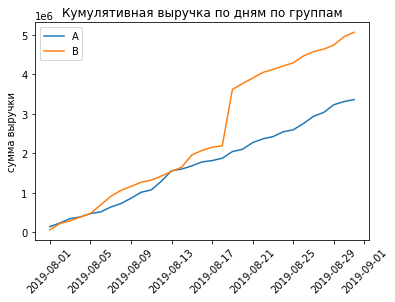

In [55]:
# Построили графики кумулятивной выручки по дням по группам.

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend()
plt.title('Кумулятивная выручка по дням по группам')
plt.xticks(rotation=45)
plt.ylabel('сумма выручки');

В течение всего наблюдаемого времени выручка по группе В превышала показатели выручки группы А. Выручка растет по группам А и В в течение всего теста. 
Наблюдается значительный рост выручки в промежутке с 17 августа по 21 августа. - возможно влияние аномальных значений.

#### Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

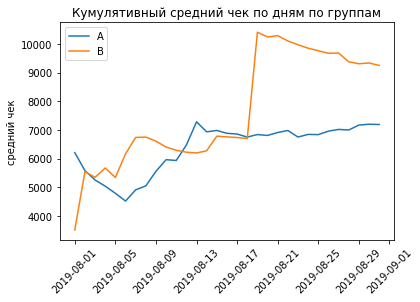

In [56]:
# Построили графики кумулятивного среднего чека по дням по группам.

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label = 'A')

plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label = 'B')

plt.legend()
plt.title('Кумулятивный средний чек по дням по группам')
plt.xticks(rotation=45)
plt.ylabel('средний чек');

Ближе к концу теста средний чек становится более плавным (стабилизируется по группам). В течение рассматриваемого периода средний чек по группе В в основном превышает средний чек по группе А (кроме начала теста - 1 августа и 13 августа (возможно влияние аномального заказа в группе А). По графику среднего чека также прослеживается влияние аномального заказа в группе В с 17 по 21 августа). Далее будет рассмотрено влияние аномальных значений на результативность теста.

#### Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

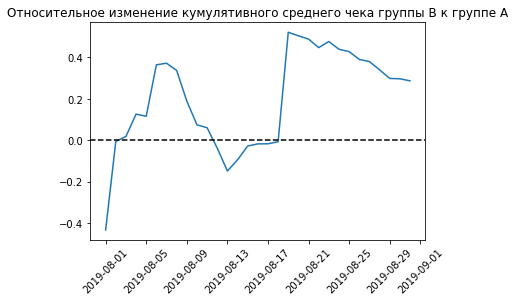

In [25]:
#Объединили таблицы cumulativeRevenueA и cumulativeRevenueB. 
# Сохранили в переменной mergedCumulativeRevenue.

mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on = ['date'], right_on = ['date'], how = 'left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

plt.axhline(y=0, color='black', linestyle='--')
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.xticks(rotation=45);

В целом как и было замечено ранее - кумулятивный средний чек в основном превышает показатели чека группы А, кроме некоторых скачков в начале теста и в середине теста - на лицо влиятие аномальных заказов как в группе А, так и в группе В.

#### Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.

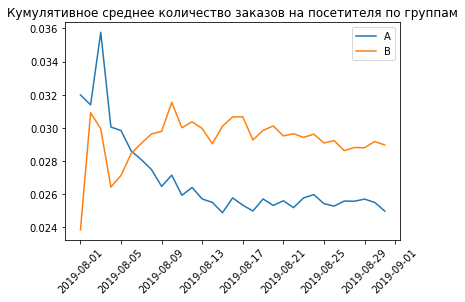

In [26]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.title('Кумулятивное среднее количество заказов на посетителя по группам')
plt.xticks(rotation=45);

Динамика по группам за первые дни теста была достаточно однонаправлена, однако после 5 августа конверсия группы В вырвалась вперёд и зафиксировалась относительно значений 0,28 - 0,31, а конверсия группы А просела и также зафиксировалась относительно значений 0,025 по 0,027.

#### Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.

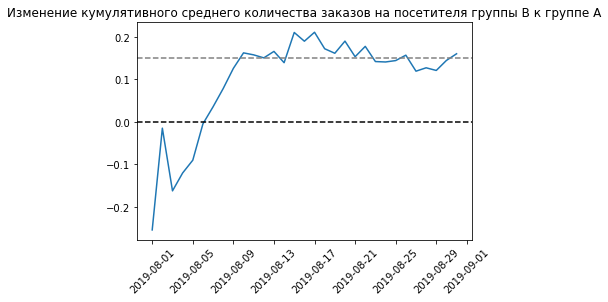

In [27]:
#Объедининим таблицы cumulativeDataA и cumulativeDataB, объявим переменную mergedCumulativeConversions
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on = 'date', right_on = 'date', how = 'left', suffixes=['A', 'B'])

# строим графики
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.title('Изменение кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xticks(rotation=45);

Почти с самого начала группа В лидирует по конверсии: становится лучше с 5 августа по 17 августа, и затем принимает более плавные значения вокруг значений от 0,12 до 0,17. Данный график включает влияние выбросов - возможно пик 17 августа уйдет и конверсия станет более плавной и стабилизируется вокруг какого-то значения

#### Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

,visitorId,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


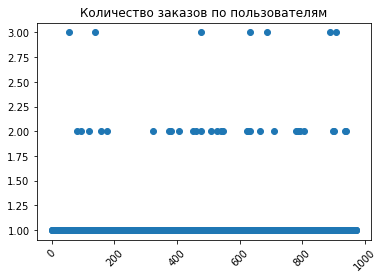

In [28]:
#сгруппируем количество заказов по ID пользователя
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
#объявим наименования столцов
ordersByUsers.columns = ['visitorId', 'orders']

#выведем 10 пользователей, которые сделали больше всего заказов
display(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))

#строим график
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Количество заказов по пользователям')
plt.xticks(rotation=45);

На графике можно выделить преобладающую долю пользователей, сделавших 1 заказ. Количество тех, кто сделал 2 заказа уже меньше, но пока не понятно, выбросы ли это или нет. С помощью расчетов персенлилей мы определим количество заказов, характерных для большинства пользователей (95%, 99% пользователей)

#### Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [29]:
#с помощью метода np.percentile найдем 95-й и 99-й перцентили:

print(np.percentile(ordersByUsers['orders'], [95, 99]))

[1. 2.]


Все таки для большинства пользователей количество заказов не превышает 1: 95% пользователей. Определим границу аномальных пользователей, сделавших 2 и более заказов

#### Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

      transactionId   visitorId       date  revenue group
425       590470918  1920142716 2019-08-19  1294500     B
1196     3936777065  2108080724 2019-08-15   202740     B
1136      666610489  1307669133 2019-08-13    92550     A
744      3668308183   888512513 2019-08-27    86620     B
743      3603576309  4133034833 2019-08-09    67990     A
1103     1348774318  1164614297 2019-08-12    66350     A
1099      316924019   148427295 2019-08-12    65710     A
949      1347999392   887908475 2019-08-21    60450     A
940      2420050534  4003628586 2019-08-08    58550     B
131      3163614039  2254586615 2019-08-22    53904     A


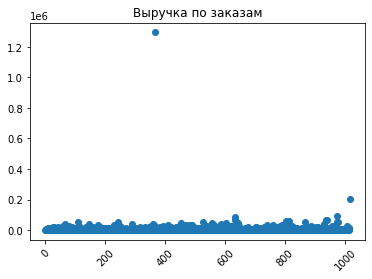

In [30]:
#сгруппируем количество заказов по ID пользователя
print(orders.sort_values(by='revenue', ascending=False).head(10))

x_values = pd.Series(range(0, len(orders['revenue'])))

#строим график
plt.scatter(x_values, orders['revenue'])
plt.title('Выручка по заказам')
plt.xticks(rotation=45);

На графике видно, что большинство заказов не превышает 100 000 д.е., все остальное - выбросы. С помощью персентилей определим, какое значение выручки характерно для большинства пользователей.

#### Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [31]:
#с помощью метода np.percentile найдем 95-й и 99-й перцентили:

print(np.percentile(orders['revenue'], [95, 99]))

[26785. 53904.]


Для большинства пользователей размер заказа не превышает 27 тыс д.е., в связи с чем возьмем в качестве границы аномальных значений выручку в размере 27 тыс д.е.

#### Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.

Сформулируем гипотезы. 

**Нулевая:** различий в среднем количестве заказов между группами нет. 

**Альтернативная:** различия в среднем между группами есть.

In [32]:
#сгруппируем пользователей группы А по дням
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]

#обьявим наименование колонок
visitorsADaily.columns = ['date', 'visitorsPerDateA']

#посчитаем кумулятивное значение по пользователям группы А
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)

#обьявим наименование колонок
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

In [33]:
#сгруппируем пользователей группы B по дням
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]

#обьявим наименование колонок
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

#посчитаем кумулятивное значение по пользователям группы B
visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)

#обьявим наименование колонок
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

In [34]:
#группируем данные по заказам по группе А по дате
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)

#обьявим наименование колонок
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

#посчитаем кумулятивное значение по пользователям группы А
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])

#обьявим наименование колонок
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

In [35]:
#группируем данные по заказам по группе B по дате
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)

#обьявим наименование колонок
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

#посчитаем кумулятивное значение по пользователям группы B
ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])

#обьявим наименование колонок
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

In [36]:
#объединим заказы по группе А по дням (ordersADaily), заказы по группе В по дням (ordersBDaily), кумулятивные значения по 
#заказам по дням для групп А и В(ordersACummulative и ordersBCummulative), пользователей по дням для групп А и В 
#(visitorsADaily и visitorsBDaily) и кумулятивное количество пользователей по группам А и В (visitorsACummulative и 
# visitorsBCummulative)

data_merged = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

display(data_merged.head(5))

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


In [37]:
# объявим переменные ordersByUsersA для пользователей группы А, где для пользователей, совершивших хотя бы 1 заказ, 
# будет указано число заказов
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index = False)
    .agg({'transactionId': pd.Series.nunique}))

#обьявим наименование колонок
ordersByUsersA.columns = ['visitorId', 'orders']

In [38]:
# объявим переменные ordersByUsersB для пользователей группы B, где для пользователей, совершивших хотя бы 1 заказ, 
# будет указано число заказов
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index = False)
    .agg({'transactionId': pd.Series.nunique}))

#обьявим наименование колонок
ordersByUsersB.columns = ['visitorId', 'orders']

In [39]:
#Объявим переменные sampleA и sampleB, в которых пользователям с заказами будет соответствовать число заказов пользователя. 
#А пользователям без заказов — нули.

sampleA = pd.concat([ordersByUsersA['orders'], pd.Series(0, index = np.arange(data_merged['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name = 'orders')], axis = 0)

sampleB = pd.concat([ordersByUsersB['orders'], pd.Series(0, index = np.arange(data_merged['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name = 'orders')], axis = 0)

In [63]:
# Посчитаем статистическую значимость различия среднего количества заказов по результатам теста. Применим для этого
#тест Манна-Уитни. Выведем p-value для сравнения среднего между группами. Округлите p-value до 5 знаков после запятой.

alpha = 0.05

print("{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

if stats.mannwhitneyu(sampleA, sampleB)[1] < alpha:
    print('p-value меньше критического значения, отклоняем нулевую гипотезу: статистическая значимость достигнута и сегмент В лучше А')
else:
    print('p-value больше критического значения, не отклоняем нулевую гипотезу: статистическая значимость не достигнута')

0.01102
p-value меньше критического значения, отклоняем нулевую гипотезу: статистическая значимость достигнута и сегмент В лучше А


In [41]:
#Вычислим и выведем относительное различие в среднем между группами. Округлим до 3 знаков после запятой.
print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

0.160


Относительный выигрыш сегмента В относительно А составил 16%.

По "сырым" данным статистическая значимость достигнута и сегмент В лучше А по количеству заказов на посетителя

#### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

Сформулируем гипотезы.

**Нулевая:** различий в среднем чеке между группами нет.

**Альтернативная:** различия в среднем между группами есть.

In [58]:
alpha = 0.05

p_value = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]

print('{0:.3f}'.format(p_value)) 

if p_value < alpha:
    print('p-value меньше критического значения, отклоняем нулевую гипотезу: статистическая значимость достигнута и сегмент В лучше А')
else:
    print('p-value больше критического значения, не отклоняем нулевую гипотезу: статистическая значимость не достигнута')

0.829
p-value больше критического значения, не отклоняем нулевую гипотезу: статистическая значимость не достигнута


In [43]:
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.287


Несмотря на высокий уровень превышения среднего чека группы В по сравнению с группой А, статистическая значимость не достигнута и различий в среднем чеке между группами нет.

#### Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.

Сформулируем гипотезы.

**Нулевая:** различий в среднем количестве заказов на посетителя между группами по «очищенным» данным нет.

**Альтернативная:** различия в среднем между группами есть.

Ранее было выбраны границы аномальных пользователей, сделавших 2 и более заказов и аномальные значения выручки в размере 27 тыс д.е.
Проверим, сколько % пользователей соотвествуют этим аномальным границам.

In [59]:
order_max = 2
revenue_max = 27000

usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] >= order_max]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] >= order_max]['visitorId'],
    ],
    axis = 0,
)

usersWithExpensiveOrders = orders[orders['revenue'] > revenue_max]['visitorId']

abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0)
    .drop_duplicates()
    .sort_values()
)

print(abnormalUsers.count())
print(round(abnormalUsers.count()*100/len(orders['visitorId'].unique()),2))

86
8.84


Всего 86 пользователей или 9% всех пользователей попадают под аномальные границы, можем исключить их из анализа

In [45]:
#объявим переменную sampleAFiltered, в которых сохраним очищенные данные о заказах группы А — не включая аномальных пользователей.

sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index = np.arange(
                data_merged['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name = 'orders',
        ),
    ],
    axis = 0,
)

In [46]:
#объявим переменную sampleВFiltered, в которых сохраним очищенные данные о заказах группы B — не включая аномальных пользователей.

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index = np.arange(
                data_merged['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name = 'orders',
        ),
    ],
    axis = 0,
)

In [60]:
#выведем p-value для сравнения среднего между очищенными группами. Округлим p-value до пяти знаков после запятой. 
alpha = 0.05

print('{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))

if stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1] < alpha:
    print('p-value меньше критического значения, отклоняем нулевую гипотезу: статистическая значимость достигнута и сегмент В лучше А')
else:
    print('p-value больше критического значения, не отклоняем нулевую гипотезу: статистическая значимость не достигнута')

0.01593
p-value меньше критического значения, отклоняем нулевую гипотезу: статистическая значимость достигнута и сегмент В лучше А


In [48]:
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

0.174


Прирост среднего количества заказов группы В относительно группы А составляет 17,4%

#### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

Сформулируем гипотезы.

**Нулевая:** различий в среднем чеке заказа между группами по «очищенным» данным нет.

**Альтернативная:** различия в среднем между группами есть.

In [61]:
alpha = 0.05

p_value = stats.mannwhitneyu(
            orders[
                np.logical_and(orders['group'] == 'A', np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                              )
            ]['revenue'],
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'],
        )[1]

print('{0:.3f}'.format(p_value))

if p_value < alpha:
    print('p-value меньше критического значения, отклоняем нулевую гипотезу: статистическая значимость достигнута и сегмент В лучше А')
else:
    print('p-value больше критического значения, не отклоняем нулевую гипотезу: статистическая значимость не достигнута')

0.727
p-value больше критического значения, не отклоняем нулевую гипотезу: статистическая значимость не достигнута


In [50]:
print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

-0.034


Прирост среднего чека при удалении аномальных пользователей группы В дал отрицательный результат: группа А лучше показывает себя, чем группа В

### Выводы:

В рамках части 2 было предложено рассмотреть А/В тестирование гипотезы, оказавшей влияние на выручку и количество заказов.
Для данной задачи было представлено 2 датасета:

* датасет с описанием заказов, которые совершили пользователи - участники А/В теста (orders.csv);
* датасет с описанием количества участников А/В теста (visitors.csv)

*Шаг 1: были подгружены данные и сделана предобработка данных:
* Датасет "orders" содержит 1 197 строк и 5 столбцов. Данные по ID транзакциям, ID пользователям и сумме выручки - целочисленные значения (int64), дата и обозначение группы - тип строки. Пустых значений нет. Дублирующие строки отсутствуют

* Датасет "visitors.csv" содержит 62 строки и 3 столбца. Данные по дате и обозначении группы - тип строки. Количество пользователей - целочисленное значение (int64). Пустых значений нет. Дублирующие строки отсутствуют

* преобразовали даты под тип datetime64[ns]
* выяснили, есть ли пользователи, которые попали в группу А и в группу В: отчистили датасет от 58 пользователей, попавших в обе группы

Итоговый датасет "orders" 1 016 строк и 5 столбцов. Данные по ID транзакциям, ID пользователям и сумме выручки - целочисленные значения (int64), дата - datetime, обозначение группы - тип строки. Пустых значений нет. Дублирующие строки отсутствуют.

*Шаг 2: обзор результатов А/В тестирование с использованием графиков.

* был построен график кумулятивной выручки по группам А и В. В течение всего наблюдаемого времени выручка по группе В превышала показатели выручки группы А. Выручка растет по группам А и В в течение всего теста. Наблюдается значительный рост выручки в промежутке с 17 августа по 21 августа. - возможно влияние аномальных значений.

* был построен график кумулятивного среднего чека. Ближе к концу теста средний чек становится более плавным (стабилизируется по группам). В течение рассматриваемого периода средний чек по группе В в основном превышает средний чек по группе А (кроме начала теста - 1 августа и 13 августа (возможно влияние аномального заказа в группе А). По графику среднего чека также прослеживается влияние аномального заказа в группе В с 17 по 21 августа). Далее будет рассмотрено влияние аномальных значений на результативность теста.

* был построен график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Почти с самого начала группа В лидирует по конверсии: становится лучше с 5 августа по 17 августа, и затем принимает более плавные значения вокруг значений от 0,12 до 0,17. Данный график включает влияние выбросов - возможно пик 17 августа уйдет и конверсия станет более плавной и стабилизируется вокруг какого-то значения

* был построен точечный график количества заказов по пользователям. На графике можно выделить преобладающую долю пользователей, сделавших 1 заказ. Количество тех, кто сделал 2 заказа уже меньше С помощью расчета перцентилей было определено, что для большинства пользователей количество заказов не превышает 1: 95% пользователей. Определим границу аномальных пользователей, сделавших 2 и более заказов.

* был построен точечный график стоимостей заказов. На графике видно, что большинство заказов не превышает 100 000 д.е., все остальное - выбросы. С помощью персентилей определили, что характерно для большинства пользователей размер заказа не превышает 27 тыс д.е., в связи с чем возьмем в качестве границы аномальных значений выручку в размере 27 тыс д.е.

*Шаг 3: статистическая проверка гипотез по "сырым" данным

Были выдвинуты следующие гипотезы:

**#1**

**Нулевая:** различий в среднем количестве заказов между группами нет.

**Альтернативная:** различия в среднем между группами есть.

Сравнив p-value с критическим уровнем значимости (0.05), нулевую гипотезу отклоняем. Есть статистическая разница между средним количеством заказов по группам. По "сырым" данным статистическая значимость достигнута и сегмент В лучше А по количеству заказов на посетителя на 16%.

**#2**

**Нулевая:** различий в среднем чеке между группами нет.

**Альтернативная:** различия в среднем между группами есть.

Сравнив p-value с критическим уровнем значимости (0.05), p-value больше критического значения, не отклоняем нулевую гипотезу: различий в среднем чеке между группами нет. Несмотря на высокий уровень превышения среднего чека группы В по сравнению с группой А (на 29%), статистическая значимость не достигнута.

*Шаг 4: статистическая проверка гипотез по отчищенным данным

Ранее было выбраны границы аномальных пользователей, сделавших 2 и более заказов и аномальные значения выручки в размере 27 тыс д.е. 

% пользователей, соотвествующий этим аномальным границам - 9% или 86 человек.

Были выдвинуты следующие гипотезы:

**#1**

**Нулевая:** различий в среднем количестве заказов на посетителя между группами по «очищенным» данным нет.

**Альтернативная:** различия в среднем между группами есть.

Сравнив p-value с критическим уровнем значимости (0.05), нулевую гипотезу отклоняем. Есть статистическая разница между средним количеством заказов по группам. По очищенным данным статистическая значимость достигнута и сегмент В лучше А по количеству заказов на посетителя на 17,4%.

**#2**

**Нулевая:** различий в среднем чеке заказа между группами по «очищенным» данным нет.

**Альтернативная:** различия в среднем между группами есть.

Cравнив p-value с критическим уровнем значимости (0.05), p-value больше критического значения, не отклоняем нулевую гипотезу: различий в среднем чеке между группами нет. Прирост среднего чека при удалении аномальных пользователей группы В дал отрицательный результат: группа А лучше показывает себя, чем группа В

**В результате теста удалось подтвердить увеличение количества заказов в группе В по отношению к группе А, однако не удалось подтвердить рост среднего чека по группе В относительно группы А. В связи с тем, что по графикам данные по среднему чеку и конверсии стремятся к стабильному значению (практически стабилизировались), тест можно останосить и признать успешным в части проверки увеличения количества заказов**